LINEAR REGRESSION

In [1]:
#Import data
import pandas as pd

df = pd.read_csv('insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
#Check for missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [3]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
#Label encoding, male to 0, female to 1
df.sex = df.sex.map({'male': 0,'female': 1})

#Label encoding, smoker_yes to 1, smoker_no to 0
df.smoker = df.smoker.map({'no': 0,'yes': 1})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [5]:
#Set up independent variables, X
X = pd.DataFrame(df.drop(['charges', 'region'],axis=1))
X.head()

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0


In [7]:
#Set up dependent variable, Y (charges)
Y = pd.Series(df.charges, name = 'charges')
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [8]:
#Ordinary Least Squares Regression
import statsmodels.api as sm
X2 = sm.add_constant(X) 
ols = sm.OLS(Y, X2.astype(float))
lr = ols.fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     798.0
Date:                Fri, 25 Dec 2020   Prob (F-statistic):               0.00
Time:                        11:33:45   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1332   BIC:                         2.715e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.218e+04    963.902    -12.637      0.0

In [96]:
#Remove variables of no significance, based on p-value
maxp = lr.pvalues.max()
while(maxp > 0.05):
    X2.drop(lr.pvalues.idxmax(),axis=1,inplace=True) 
    ols = sm.OLS(Y,X2)
    lr = ols.fit()
    maxp = lr.pvalues.max()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Tue, 22 Dec 2020   Prob (F-statistic):               0.00
Time:                        02:44:50   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

In [97]:
#Variable with smallest p value/ least significant variable
lr.pvalues.idxmax()

'children'

In [94]:
#P-value for 'children'
lr.pvalues.max()

0.0006077158346794642

In [98]:
#P values for all variables
lr.pvalues

const       1.051649e-35
age         1.748342e-89
bmi         1.973987e-30
children    6.077158e-04
smoker      0.000000e+00
dtype: float64

In [1]:
#correlation matrix
df.corr()

NameError: name 'df' is not defined

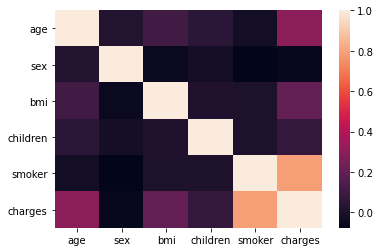

In [273]:
import seaborn as sns
ht = sns.heatmap(df.corr())

In [105]:
X2

,const,age,bmi,children,smoker
0,1.0,19,27.900,0,1
1,1.0,18,33.770,1,0
2,1.0,28,33.000,3,0
3,1.0,33,22.705,0,0
4,1.0,32,28.880,0,0
...,...,...,...,...,...
1333,1.0,50,30.970,3,0
1334,1.0,18,31.920,0,0
1335,1.0,18,36.850,0,0
1336,1.0,21,25.800,0,0


In [274]:
#K-fold cross validation
K=X2.drop('const',axis=1)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),K,Y,cv=5).mean()

0.7469266088153269

In [275]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(K,Y,random_state=1,test_size=0.3)

In [282]:
#Score
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.7391977350447327

In [283]:
model.score(X_train,y_train)

0.7534660757342135

In [277]:
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import math

print(r2_score(y_test,y_pred)) #R^2
print(mean_squared_error(y_test,y_pred)) #MSE
print(math.sqrt(mean_squared_error(y_test,y_pred))) #RMSE

0.7391977350447327
36960029.279070735
6079.476069454566


In [278]:
#negative RMSE
cross_val_score(LinearRegression(),K,Y,cv=5,
                scoring='neg_root_mean_squared_error').mean()

-6072.422772978546

In [279]:
n = len(X_test)
k = len(X_test.iloc[0])
R2 = r2_score(y_test,y_pred)

In [280]:
Adj_R2 = 1 - ((n-1)*(1- R2)/(n-k-1))
print(Adj_R2)

0.7365700044154606


LOGISTIC REGRESSION

In [8]:
#Import data
import pandas as pd

df2 = pd.read_csv('general_data.csv')

df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [9]:
#Check for missing obs
df2.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [10]:
#Replace NA with 0
df2.fillna({'NumCompaniesWorked':0,},inplace = True)
df2.fillna({'TotalWorkingYears':0,},inplace = True)

df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [11]:
df2.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299297,-0.033137,NaN,-0.031753,0.678436,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.012617,0.038125,NaN,0.011169,0.008925,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016096,-0.040531,NaN,0.001261,-0.011581,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,0.000144,-0.004456,NaN,-0.014254,-0.000139,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.010877,0.010973,NaN,0.000993,-0.035498,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.019915,0.004325,NaN,0.026930,-0.033694,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299297,-0.012617,-0.016096,NaN,0.000144,-0.010877,-0.019915,1.000000,0.031683,NaN,0.017685,0.237472,-0.032123,-0.116322,-0.035421,-0.108223
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.031683,1.000000,NaN,0.012548,-0.019495,-0.037392,-0.029707,-0.029542,-0.040864
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Label encoding, no to 0, yes to 1 for Attrition
df2.Attrition = df2.Attrition.map({'No': 0,'Yes': 1})


df2.BusinessTravel = df2.BusinessTravel.map({'Non-Travel': 0,'Travel_Rarely': 1, 'Travel_Frequently': 2})
df2.Gender = df2.Gender.map({'Male': 0,'Female': 1})



df2.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,1,Sales,6,2,Life Sciences,1,1,1,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,1,2,Research & Development,10,1,Life Sciences,1,2,1,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,0,2,Research & Development,17,4,Other,1,3,0,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,0,0,Research & Development,2,5,Life Sciences,1,4,0,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,0,1,Research & Development,10,1,Medical,1,5,0,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [13]:
X = pd.DataFrame(df2, columns = ['BusinessTravel','Gender','Education',
                                 'JobLevel'])
X.head()

,BusinessTravel,Gender,Education,JobLevel
0,1,1,2,1
1,2,1,1,1
2,2,0,4,4
3,0,0,5,3
4,1,0,1,1


In [14]:
y = pd.Series(df2.Attrition, name = 'Attrition')
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int64

In [15]:
y.value_counts() 

0    3699
1     711
Name: Attrition, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.25)
X_test.head()

,BusinessTravel,Gender,Education,JobLevel
1172,1,1,4,2
3151,0,1,2,2
3475,1,0,1,2
674,1,1,4,1
3815,1,0,1,1


In [17]:
y_test.head()

1172    0
3151    1
3475    0
674     1
3815    0
Name: Attrition, dtype: int64

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='sag',tol=0.01,random_state=0)
#from sklearn.linear_model import LogisticRegression
#model = LogisticRegression(solver='saga',max_iter=1000, tol = 0.01)

In [21]:
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=0, solver='sag', tol=0.01)

In [22]:
#Intercept for equation
model.intercept_

array([-1.68955041])

In [23]:
#Coefficient for equation
model.coef_

array([[ 0.31431539, -0.04866214, -0.04495511, -0.03463739]])

In [24]:
probabilities_test = model.predict_proba(X_test_scaled)

In [25]:
probabilities_test[:20,1]

array([0.13667576, 0.08700468, 0.16616758, 0.14045532, 0.17060154,
       0.15285843, 0.13951204, 0.16616758, 0.16451208, 0.15859841,
       0.13809744, 0.22926982, 0.14190986, 0.23632437, 0.09797362,
       0.0854422 , 0.15285843, 0.15032875, 0.14190986, 0.13298216])

In [26]:
y_predict = model.predict(X_test_scaled)
y_predict[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [27]:
#Performance measures for classification
#Accuracy = total no. of correct prediction/total no. of datapoints

model.score(X_test_scaled,y_test)

0.8368087035358114

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy_score(y_test,y_predict)

0.8368087035358114

In [29]:
confusion_matrix(y_test,y_predict)

array([[923,   0],
       [180,   0]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       923
           1       0.00      0.00      0.00       180

    accuracy                           0.84      1103
   macro avg       0.42      0.50      0.46      1103
weighted avg       0.70      0.84      0.76      1103



C:\Users\ericy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
from sklearn.tree import DecisionTreeRegressor
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score

In [37]:
#find the 5-fold crossvalidated test_score
model = DecisionTreeRegressor(min_impurity_decrease=100)
scores = cross_val_score(model, X, y, cv = 5)
print("k-fold test R^2 = %.3f  (%.3f)" % (mean(scores), std(scores)))
model.fit(X,y)
print('training score',model.score(X,y))

k-fold test R^2 = -0.001  (0.000)
training score 0.0


In [38]:
#ROC is the curve traced by the co-ordinates (FPR,TPR) for different probability threshold values
#AUC is the area under the ROC curve

from sklearn.metrics import roc_auc_score, roc_curve
y_pred_prob = model.predict_proba(X_test_scaled)[:,1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)


import  matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Roc with auc score: {}'.format(roc_auc_score(y_test,y_pred_prob)))
plt.show()

AttributeError: 'DecisionTreeRegressor' object has no attribute 'predict_proba'